In [ ]:
#----------------1.Load the Dataset------------------------------------
import pandas as pd

# Read the dataset from local path or Google Drive (adjust filename if needed)
df = pd.read_csv('spambase.csv')

# Display the first few rows
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# 2.Preprocess the Dataset (check missing, fill, normalize)

from sklearn.preprocessing import MinMaxScaler

# Step 1: Check for missing values
print(" Missing values in each column:")
print(df.isnull().sum())

# Step 2: Fill missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Split features and labels
X = df.drop('class', axis=1)
y = df['class']

# Step 4: Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Scales all values between 0 and 1

# Step 5: Print shapes for confirmation
print(f"\nFeatures shape: {X.shape}, Labels shape: {y.shape}")


 Missing values in each column:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_fre

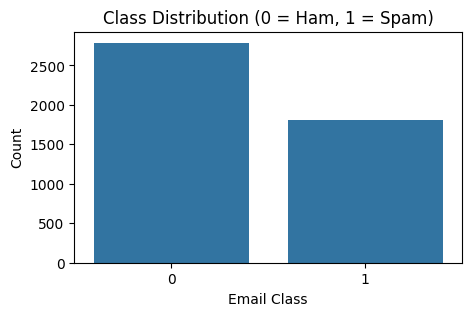

In [ ]:
# 3.Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Check how many spam (1) and ham (0) emails are in the dataset
plt.figure(figsize=(5, 3))
sns.countplot(x=y)
plt.title("Class Distribution (0 = Ham, 1 = Spam)")
plt.xlabel("Email Class")
plt.ylabel("Count")
plt.show()


In [ ]:
# 4.Split into Train and Test Sets

from sklearn.model_selection import train_test_split

# Step: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes of splits
print(f" X_train: {X_train.shape}")
print(f" X_test : {X_test.shape}")
print(f" y_train: {y_train.shape}")
print(f" y_test : {y_test.shape}")


 X_train: (3680, 57)
 X_test : (921, 57)
 y_train: (3680,)
 y_test : (921,)


# **NAIVE BAYES**

In [ ]:
# 5.Train Naïve Bayes (Gaussian, Multinomial, Bernoulli)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

nb_models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}
# Train and evaluate each Naive Bayes model
for name, model in nb_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")


GaussianNB Accuracy: 0.8219
MultinomialNB Accuracy: 0.8719
BernoulliNB Accuracy: 0.8806



Evaluation for GaussianNB
Accuracy : 0.8219
Precision: 0.7233
Recall   : 0.9385
F1 Score : 0.8170

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       531
           1       0.72      0.94      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



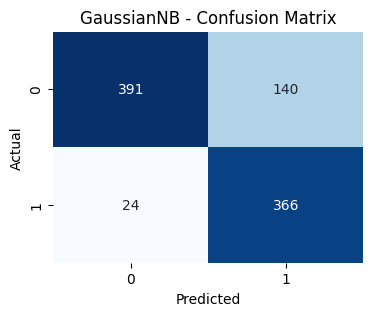

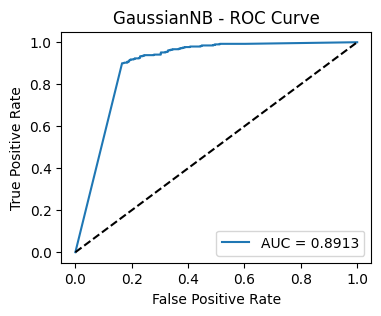


Evaluation for MultinomialNB
Accuracy : 0.8719
Precision: 0.9503
Recall   : 0.7359
F1 Score : 0.8295

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       531
           1       0.95      0.74      0.83       390

    accuracy                           0.87       921
   macro avg       0.89      0.85      0.86       921
weighted avg       0.88      0.87      0.87       921



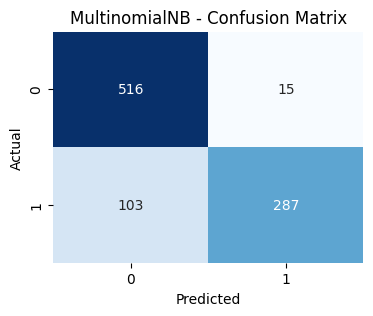

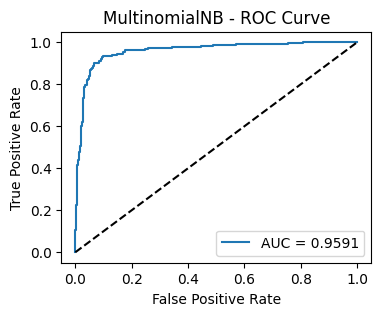


Evaluation for BernoulliNB
Accuracy : 0.8806
Precision: 0.9046
Recall   : 0.8026
F1 Score : 0.8505

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       531
           1       0.90      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



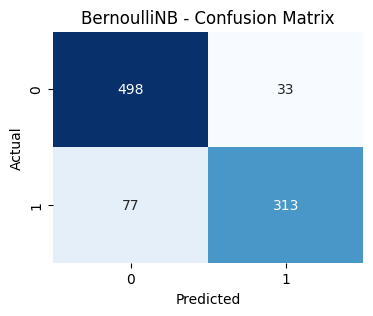

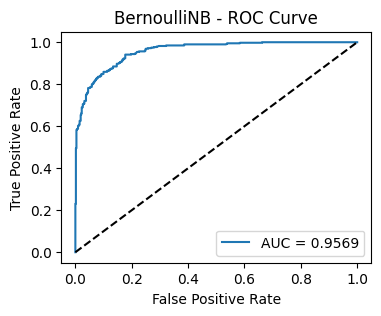

In [ ]:
# 6.Evaluate Naïve Bayes Models (Metrics, Confusion Matrix, ROC)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate and display all metrics and plots
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC Curve

    # 1. Text Metrics
    print(f"\nEvaluation for {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # 2. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate all 3 Naive Bayes models
for name, model in nb_models.items():
    evaluate_model(name, model, X_test, y_test)


In [ ]:
# 7.K-Fold Cross-Validation (K = 5) for Naïve Bayes models

from sklearn.model_selection import cross_val_score
import numpy as np

# Set number of folds
k = 5

# Perform K-Fold CV for each Naive Bayes variant
for name, model in nb_models.items():
    print(f"\n K-Fold CV for {name}:")

    # cross_val_score returns accuracy scores for each fold
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

    # Display scores
    print(f"Fold Accuracies : {scores}")
    print(f"Mean Accuracy   : {np.mean(scores):.4f}")
    print(f"Standard Dev.   : {np.std(scores):.4f}")



 K-Fold CV for GaussianNB:
Fold Accuracies : [0.85124864 0.86630435 0.85434783 0.84347826 0.69565217]
Mean Accuracy   : 0.8222
Standard Dev.   : 0.0637

 K-Fold CV for MultinomialNB:
Fold Accuracies : [0.86102063 0.88478261 0.86413043 0.90326087 0.83043478]
Mean Accuracy   : 0.8687
Standard Dev.   : 0.0245

 K-Fold CV for BernoulliNB:
Fold Accuracies : [0.90010858 0.90543478 0.91195652 0.91195652 0.775     ]
Mean Accuracy   : 0.8809
Standard Dev.   : 0.0531


In [ ]:
# 8. Performance Comparison Table for Naïve Bayes Variants

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Dictionary to store results
results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1Score'],
    'GaussianNB': [],
    'MultinomialNB': [],
    'BernoulliNB': []
}

# Evaluate and fill metrics for each model
for name, model in nb_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name].extend([acc, prec, rec, f1])

# Create DataFrame
nb_comparison_df = pd.DataFrame(results)

# Display the table
print(" Performance Comparison of Naïve Bayes Variants:\n")
print(nb_comparison_df)


 Performance Comparison of Naïve Bayes Variants:

      Metric  GaussianNB  MultinomialNB  BernoulliNB
0   Accuracy    0.821933       0.871878     0.880565
1  Precision    0.723320       0.950331     0.904624
2     Recall    0.938462       0.735897     0.802564
3    F1Score    0.816964       0.829480     0.850543


# **KNN MODEL**

In [ ]:
# 9.Train KNN model
from sklearn.neighbors import KNeighborsClassifier

k_values = [1,3, 5, 7]
algorithms = ['kd_tree', 'ball_tree']

knn_models = {}

for algo in algorithms:
    for k in k_values:
        model_name = f"KNN_k{k}_{algo}"
        knn = KNeighborsClassifier(n_neighbors=k, algorithm=algo)
        knn.fit(X_train, y_train)
        knn_models[model_name] = knn

print(f"Trained {len(knn_models)} KNN models with different k and algorithms.")


Trained 8 KNN models with different k and algorithms.



Evaluation for KNN_k1_kd_tree
Accuracy : 0.8817
Precision: 0.8486
Recall   : 0.8769
F1 Score : 0.8625


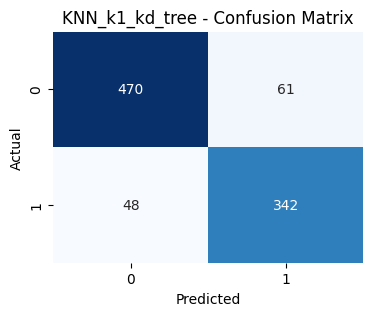

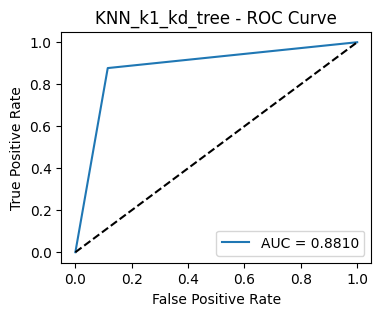


Evaluation for KNN_k3_kd_tree
Accuracy : 0.8806
Precision: 0.8723
Recall   : 0.8410
F1 Score : 0.8564


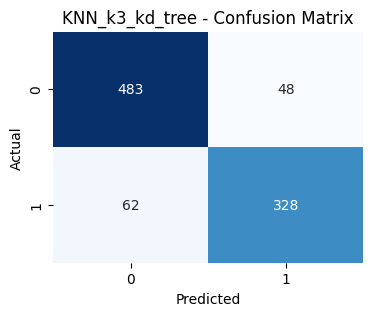

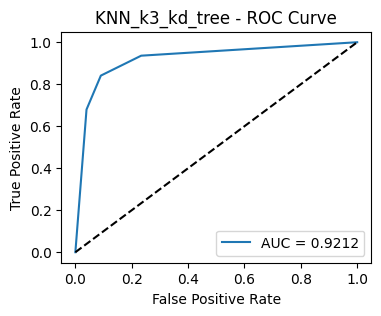


Evaluation for KNN_k5_kd_tree
Accuracy : 0.8838
Precision: 0.8773
Recall   : 0.8436
F1 Score : 0.8601


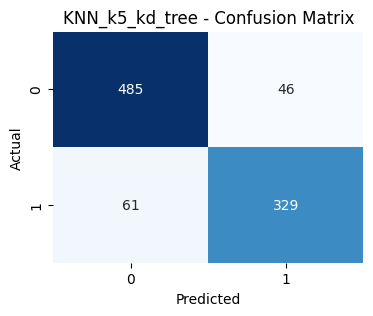

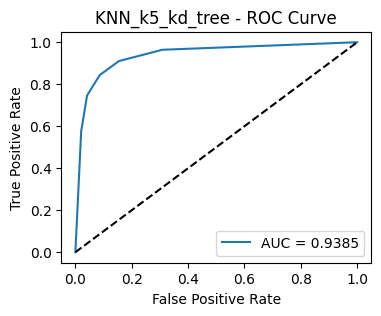


Evaluation for KNN_k7_kd_tree
Accuracy : 0.8849
Precision: 0.8797
Recall   : 0.8436
F1 Score : 0.8613


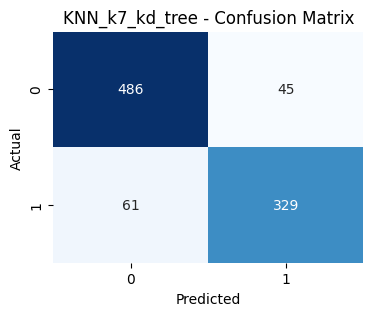

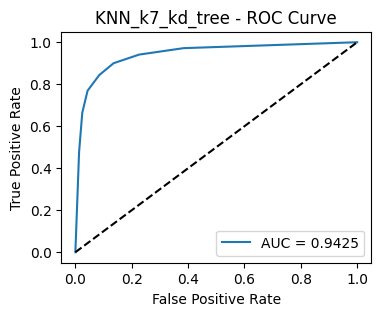


Evaluation for KNN_k1_ball_tree
Accuracy : 0.8817
Precision: 0.8504
Recall   : 0.8744
F1 Score : 0.8622


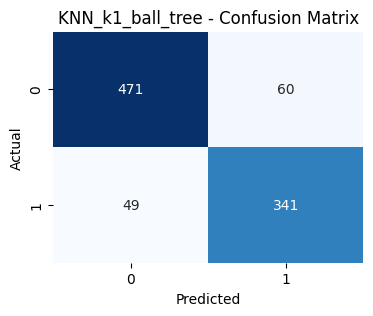

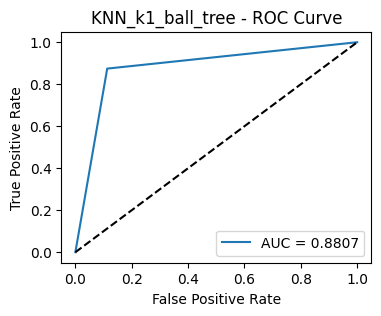


Evaluation for KNN_k3_ball_tree
Accuracy : 0.8806
Precision: 0.8723
Recall   : 0.8410
F1 Score : 0.8564


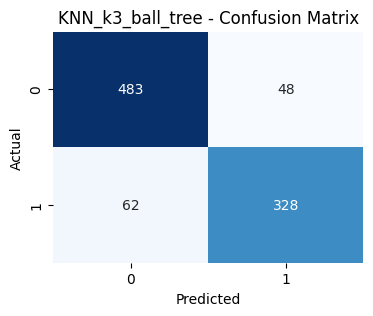

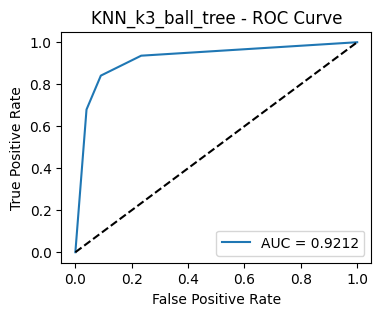


Evaluation for KNN_k5_ball_tree
Accuracy : 0.8838
Precision: 0.8773
Recall   : 0.8436
F1 Score : 0.8601


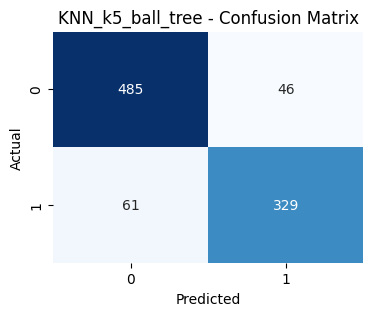

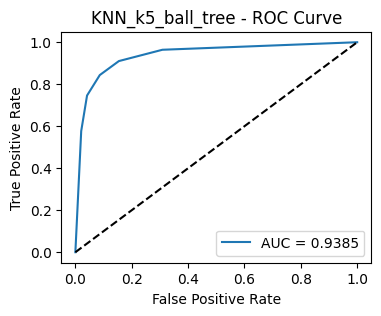


Evaluation for KNN_k7_ball_tree
Accuracy : 0.8849
Precision: 0.8797
Recall   : 0.8436
F1 Score : 0.8613


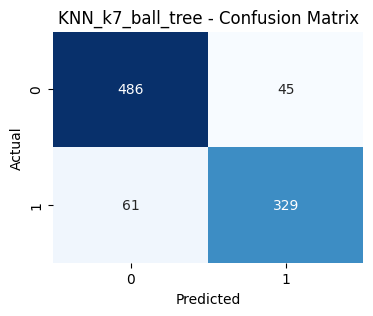

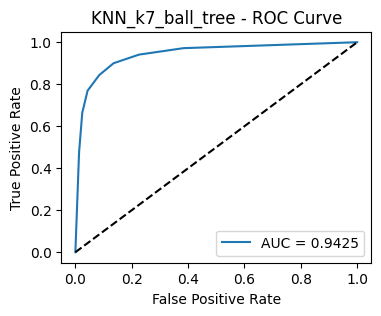

In [ ]:
# 10. Evaluate all KNN models
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_knn_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability for ROC

    print(f"\nEvaluation for {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

    # Confusion Matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve plot
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate all KNN models
for name, model in knn_models.items():
    evaluate_knn_model(name, model, X_test, y_test)


In [ ]:
#11. Kfold cross verification for KNN model
from sklearn.model_selection import cross_val_score
import numpy as np

k = 5

print("K-Fold Cross-Validation Results (Accuracy):\n")

for name, model in knn_models.items():
    # cross_val_score runs K-fold CV and returns accuracy scores for each fold
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")


K-Fold Cross-Validation Results (Accuracy):

KNN_k1_kd_tree: Mean Accuracy = 0.8657, Std Dev = 0.0596
KNN_k3_kd_tree: Mean Accuracy = 0.8581, Std Dev = 0.0624
KNN_k5_kd_tree: Mean Accuracy = 0.8646, Std Dev = 0.0573
KNN_k7_kd_tree: Mean Accuracy = 0.8663, Std Dev = 0.0561
KNN_k1_ball_tree: Mean Accuracy = 0.8655, Std Dev = 0.0594
KNN_k3_ball_tree: Mean Accuracy = 0.8583, Std Dev = 0.0626
KNN_k5_ball_tree: Mean Accuracy = 0.8646, Std Dev = 0.0573
KNN_k7_ball_tree: Mean Accuracy = 0.8663, Std Dev = 0.0561


In [ ]:
# 12.KNN performance for different k values
k_values = [1, 3, 5, 7]

# Prepare separate dictionaries
kd_tree_results = {
    'k': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1Score': []
}

ball_tree_results = {
    'k': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1Score': []
}

for k in k_values:
    # KDTree model
    kd_model = knn_models[f"KNN_k{k}_kd_tree"]
    kd_pred = kd_model.predict(X_test)
    kd_tree_results['k'].append(k)
    kd_tree_results['Accuracy'].append(accuracy_score(y_test, kd_pred))
    kd_tree_results['Precision'].append(precision_score(y_test, kd_pred))
    kd_tree_results['Recall'].append(recall_score(y_test, kd_pred))
    kd_tree_results['F1Score'].append(f1_score(y_test, kd_pred))

    # BallTree model
    ball_model = knn_models[f"KNN_k{k}_ball_tree"]
    ball_pred = ball_model.predict(X_test)
    ball_tree_results['k'].append(k)
    ball_tree_results['Accuracy'].append(accuracy_score(y_test, ball_pred))
    ball_tree_results['Precision'].append(precision_score(y_test, ball_pred))
    ball_tree_results['Recall'].append(recall_score(y_test, ball_pred))
    ball_tree_results['F1Score'].append(f1_score(y_test, ball_pred))

# Create DataFrames
kd_tree_df = pd.DataFrame(kd_tree_results)
ball_tree_df = pd.DataFrame(ball_tree_results)

print("Table 2a: KNN Performance for KDTree Algorithm")
print(kd_tree_df)

print("\nTable 2b: KNN Performance for BallTree Algorithm")
print(ball_tree_df)



Table 2a: KNN Performance for KDTree Algorithm
   k  Accuracy  Precision    Recall   F1Score
0  1  0.881650   0.848635  0.876923  0.862547
1  3  0.880565   0.872340  0.841026  0.856397
2  5  0.883822   0.877333  0.843590  0.860131
3  7  0.884908   0.879679  0.843590  0.861257

Table 2b: KNN Performance for BallTree Algorithm
   k  Accuracy  Precision    Recall   F1Score
0  1  0.881650   0.850374  0.874359  0.862200
1  3  0.880565   0.872340  0.841026  0.856397
2  5  0.883822   0.877333  0.843590  0.860131
3  7  0.884908   0.879679  0.843590  0.861257


In [ ]:
# 13.KNN Comparison Between KDTree and BallTree
import time

knn_algo_results = {
    'KDTree': [],
    'BallTree': []
}

key_map = {
    'kd_tree': 'KDTree',
    'ball_tree': 'BallTree'
}

k = 5

for algo in ['kd_tree', 'ball_tree']:
    model_name = f"KNN_k{k}_{algo}"
    model = knn_models[model_name]

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)

    knn_algo_results[key_map[algo]].append(accuracy_score(y_test, y_pred))
    knn_algo_results[key_map[algo]].append(precision_score(y_test, y_pred))
    knn_algo_results[key_map[algo]].append(recall_score(y_test, y_pred))
    knn_algo_results[key_map[algo]].append(f1_score(y_test, y_pred))
    knn_algo_results[key_map[algo]].append(train_time)

# Now create DataFrame
import pandas as pd

knn_algo_df = pd.DataFrame(knn_algo_results, index=['Accuracy', 'Precision', 'Recall', 'F1Score', 'TrainingTime(s)'])
print("KNN Comparison: KDTree vs BallTree")
print(knn_algo_df)


KNN Comparison: KDTree vs BallTree
                   KDTree  BallTree
Accuracy         0.883822  0.883822
Precision        0.877333  0.877333
Recall           0.843590  0.843590
F1Score          0.860131  0.860131
TrainingTime(s)  0.028214  0.011580


# **SUPPORT VECTOR MACHINE**

In [ ]:
# 14.Train SVM models
from sklearn.svm import SVC

# Kernels to train
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to hold trained models
svm_models = {}

for kernel in kernels:
    model_name = f"SVM_{kernel}"
    svm = SVC(kernel=kernel, probability=True, random_state=42)  # probability=True for ROC later
    svm.fit(X_train, y_train)
    svm_models[model_name] = svm

print(f" Trained {len(svm_models)} SVM models with different kernels.")


 Trained 4 SVM models with different kernels.



 Evaluation for SVM_linear
Accuracy : 0.8958
Precision: 0.9324
Recall   : 0.8128
F1 Score : 0.8685


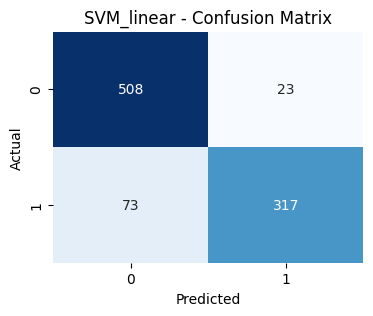

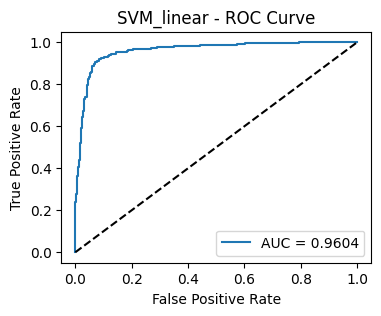


 Evaluation for SVM_poly
Accuracy : 0.8404
Precision: 0.9517
Recall   : 0.6564
F1 Score : 0.7769


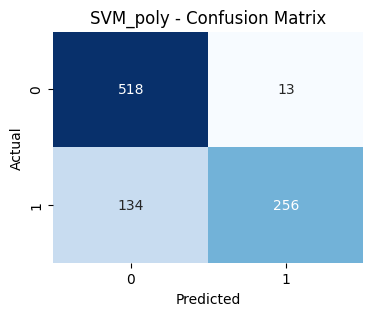

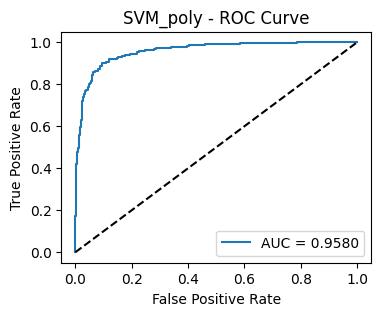


 Evaluation for SVM_rbf
Accuracy : 0.9327
Precision: 0.9530
Recall   : 0.8846
F1 Score : 0.9176


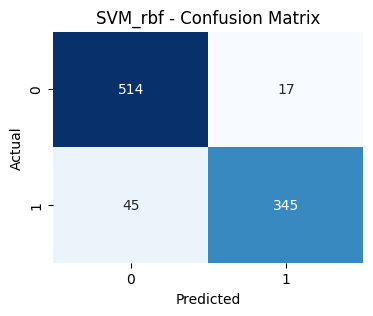

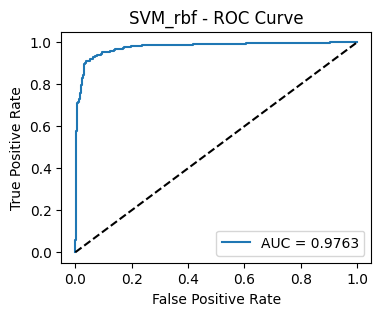


 Evaluation for SVM_sigmoid
Accuracy : 0.8035
Precision: 0.7772
Recall   : 0.7513
F1 Score : 0.7640


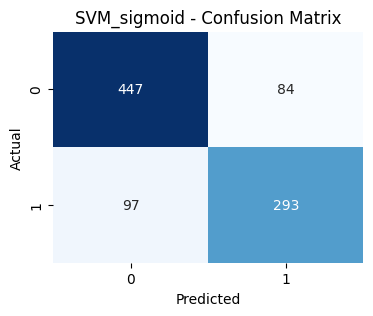

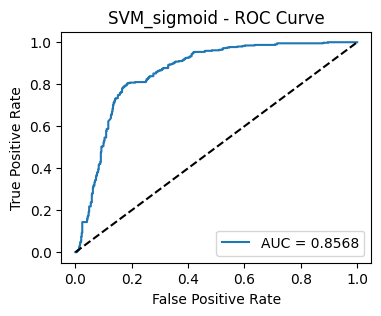

In [ ]:
# 15.Evaluate all SVM models
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_svm_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability for ROC curve

    print(f"\n Evaluation for {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

    # Confusion Matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve plot
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()

# Evaluate all SVM models
for name, model in svm_models.items():
    evaluate_svm_model(name, model, X_test, y_test)


In [ ]:
# 16.K-Fold Cross-Validation (K=5) for SVM models
from sklearn.model_selection import cross_val_score
import numpy as np

k = 5

print("K-Fold Cross-Validation Results (Accuracy):\n")

for name, model in svm_models.items():
    kernel = name.split('_')[1]

    svm_cv = SVC(kernel=kernel, probability=True, random_state=42)
    scores = cross_val_score(svm_cv, X, y, cv=k, scoring='accuracy')

    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")


K-Fold Cross-Validation Results (Accuracy):

SVM_linear: Mean Accuracy = 0.8824, Std Dev = 0.0379
SVM_poly: Mean Accuracy = 0.8379, Std Dev = 0.0318
SVM_rbf: Mean Accuracy = 0.9200, Std Dev = 0.0381
SVM_sigmoid: Mean Accuracy = 0.7970, Std Dev = 0.0351


In [ ]:
# 17.SVM Performance with Different Kernels and Parameters
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Define hyperparameters for each kernel
svm_params = {
    'linear': {'C': 1.0},
    'poly': {'C': 1.0, 'degree': 3, 'gamma': 'scale'},
    'rbf': {'C': 1.0, 'gamma': 'scale'},
    'sigmoid': {'C': 1.0, 'gamma': 'scale'}
}

# Prepare results dictionary
results = {
    'Kernel': [],
    'Hyperparameters': [],
    'Accuracy': [],
    'F1 Score': [],
    'Training Time (s)': []
}

for kernel, params in svm_params.items():
    # Create model with given hyperparameters
    svm = SVC(kernel=kernel, probability=True, random_state=42, **params)

    # Measure training time
    start = time.time()
    svm.fit(X_train, y_train)
    training_time = time.time() - start

    # Predict and evaluate
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Format hyperparameters string
    hyp_str = ', '.join([f"{key}={val}" for key, val in params.items()])

    # Append to results
    results['Kernel'].append(kernel.capitalize())
    results['Hyperparameters'].append(hyp_str)
    results['Accuracy'].append(round(acc, 4))
    results['F1 Score'].append(round(f1, 4))
    results['Training Time (s)'].append(round(training_time, 4))

# Create DataFrame
svm_results_df = pd.DataFrame(results)

print("Table 4: SVM Performance with Different Kernels and Parameters")
print(svm_results_df)


Table 4: SVM Performance with Different Kernels and Parameters
    Kernel               Hyperparameters  Accuracy  F1 Score  \
0   Linear                         C=1.0    0.8958    0.8685   
1     Poly  C=1.0, degree=3, gamma=scale    0.8404    0.7769   
2      Rbf            C=1.0, gamma=scale    0.9327    0.9176   
3  Sigmoid            C=1.0, gamma=scale    0.8035    0.7640   

   Training Time (s)  
0             1.6308  
1             2.3275  
2             1.9877  
3             2.7116  


In [ ]:
#18. Cross-Validation Scores for Each Model
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

k = 5
folds = [f"Fold {i+1}" for i in range(k)] + ["Average"]

# Function to get CV scores as a 2D array: models x folds
def get_cv_matrix(models_dict, is_svm=False):
    scores_list = []
    for name, model in models_dict.items():
        if is_svm:
            kernel = name.split('_')[1]
            model = SVC(kernel=kernel, probability=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
        scores_list.append(scores)
    return np.array(scores_list)  # shape: (num_models, k)

# Get scores matrices
nb_scores_mat = get_cv_matrix(nb_models)       # shape (num_nb_models, k)
knn_scores_mat = get_cv_matrix(knn_models)     # shape (num_knn_models, k)
svm_scores_mat = get_cv_matrix(svm_models, is_svm=True)  # shape (num_svm_models, k)

# Average across models for each fold (axis=0), then add average over folds
nb_avg_folds = np.mean(nb_scores_mat, axis=0)
knn_avg_folds = np.mean(knn_scores_mat, axis=0)
svm_avg_folds = np.mean(svm_scores_mat, axis=0)

# Append overall average (mean of fold averages)
nb_avg = np.mean(nb_avg_folds)
knn_avg = np.mean(knn_avg_folds)
svm_avg = np.mean(svm_avg_folds)

# Final arrays with fold accuracies + average
nb_final = np.append(nb_avg_folds, nb_avg)
knn_final = np.append(knn_avg_folds, knn_avg)
svm_final = np.append(svm_avg_folds, svm_avg)

# Create the DataFrame
table5_df = pd.DataFrame({
    'Fold': folds,
    'Naïve Bayes Accuracy': nb_final,
    'KNN Accuracy': knn_final,
    'SVM Accuracy': svm_final
})

print("Cross-Validation Scores for Each Model")
print(table5_df)


Cross-Validation Scores for Each Model
      Fold  Naïve Bayes Accuracy  KNN Accuracy  SVM Accuracy
0   Fold 1              0.870793      0.861292      0.853692
1   Fold 2              0.885507      0.889674      0.872826
2   Fold 3              0.876812      0.913043      0.882065
3   Fold 4              0.886232      0.902989      0.892663
4   Fold 5              0.767029      0.751359      0.795380
5  Average              0.857274      0.863671      0.859325
